In [1]:
import matplotlib
import fdsreader as fds
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

from IPython.display import display
from PIL import Image

qtot = []
delta_qtot = []
delta_qerr = []
runs = 2000
runs_list = []
hrr = []
outliers = []

for p in range(runs): #add all cases
    sim = fds.Simulation(r'euler/fds/'+str(p)+'/'+str(p))
    hrr.append(sim.hrr['Q_TOTAL'][60])
    if sim.hrr['Q_TOTAL'][60] < 3: #remove degenerate cases, threshold for hrr q_tot
        runs_list.append(int(p))
    else:
        outliers.append(int(p))

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


### Create Lists Aggregated by Attributes

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


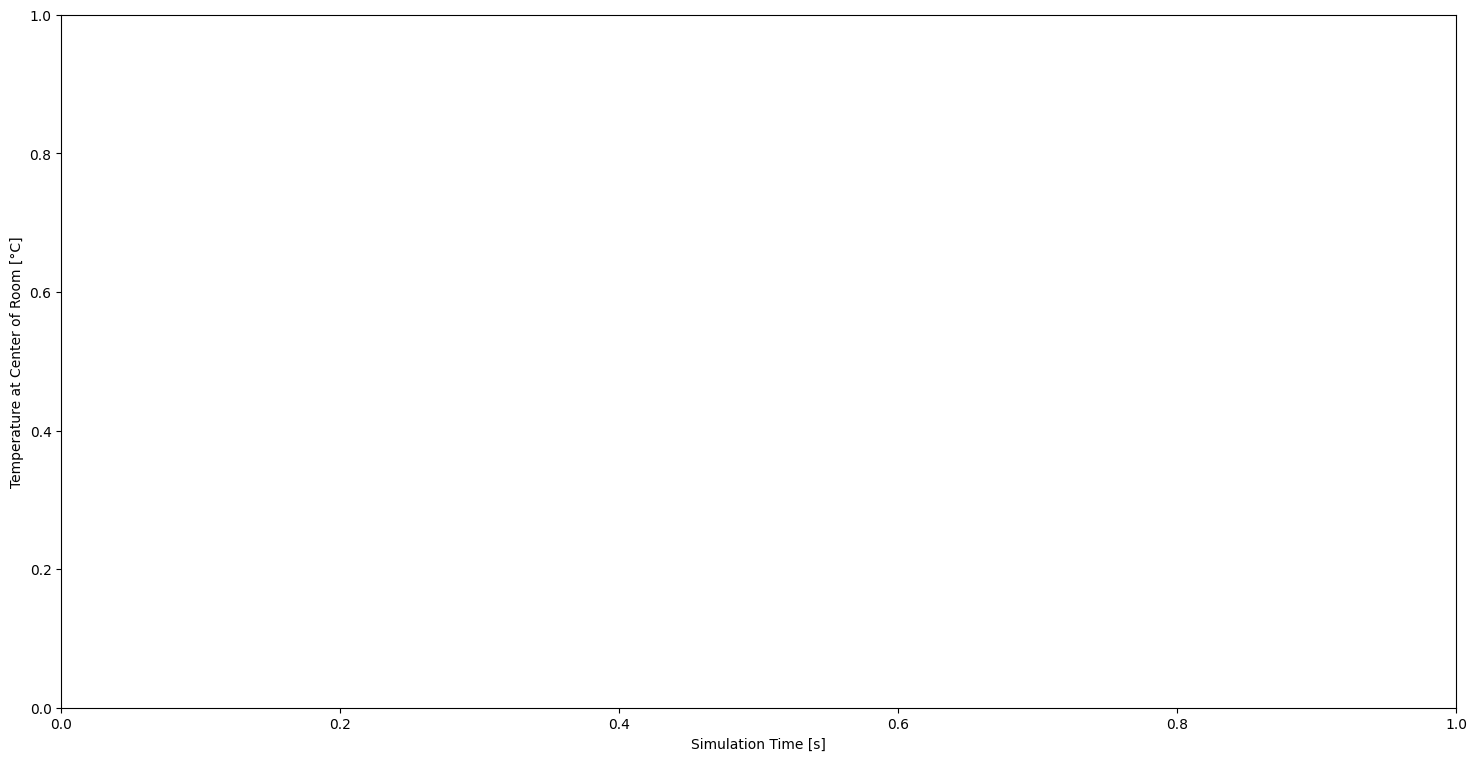

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'fds_data_summary_with_vent_type.csv')
#temperature dıstrıbutıon at t: {0,300,600}: by case
res = 1200
runs = 2000
plt.figure(figsize=(18,9))
plt.xlabel('Simulation Time [s]')
plt.ylabel('Temperature at Center of Room [°C]')
temps_30f = []
temps_30m = []
temps_30i = []
tempgrad_i = []
tempgrad_m = []
tempgrad_f = []
#vel_i = []
#vel_m = []
#vel_f = []

#vel_i_ls = []
#vel_m_ls = []
#vel_f_ls = []
#vel_i_c = []
vel_i_v = []
#vel_m_c = []
vel_m_v = []
#vel_f_c = []
vel_f_v = []
for k in range(28):
    for i in runs_list:
        row = data[data['CHID']==i]
        case = row['Floor Heating'].iloc[0]
        if case == True:
            sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
        else:
            continue
        xmid = max(sim.meshes[0][0])
        ymid = max(sim.meshes[0][1])
        xint = int(xmid*10)
        yint = int(ymid*10)
        zmid = max(sim.meshes[0][2])
        zmidint = int(zmid*10)

        for l in range(yint):
            for m in range(xint):
                temps_30i.append((sim.slices[0][0].data[0,m,l,k]))
                temps_30m.append((sim.slices[0][0].data[5,m,l,k]))
                temps_30f.append((sim.slices[0][0].data[20,m,l,k]))
        tempgrad_i.append(sum(temps_30i)/len(temps_30i))
        tempgrad_m.append(sum(temps_30m)/len(temps_30m))
        tempgrad_f.append(sum(temps_30f)/len(temps_30f))
        temps_30i = []
        temps_30m = []
        temps_30f = []
    vel_i_v.append(sum(tempgrad_i)/len(tempgrad_i))
    vel_m_v.append(sum(tempgrad_m)/len(tempgrad_m))
    vel_f_v.append(sum(tempgrad_f)/len(tempgrad_f))
    tempgrad_i = []
    tempgrad_m = []
    tempgrad_f = []
#plt.plot(temph_i,label=str(i),color=((i/max(runs_list))/1.2,(i/max(runs_list))/2.5,0),alpha=0.5,linewidth=0.25)
#plt.savefig('temp_center_heating.png',dpi=300)

### Plot Velocity Distribution by Height

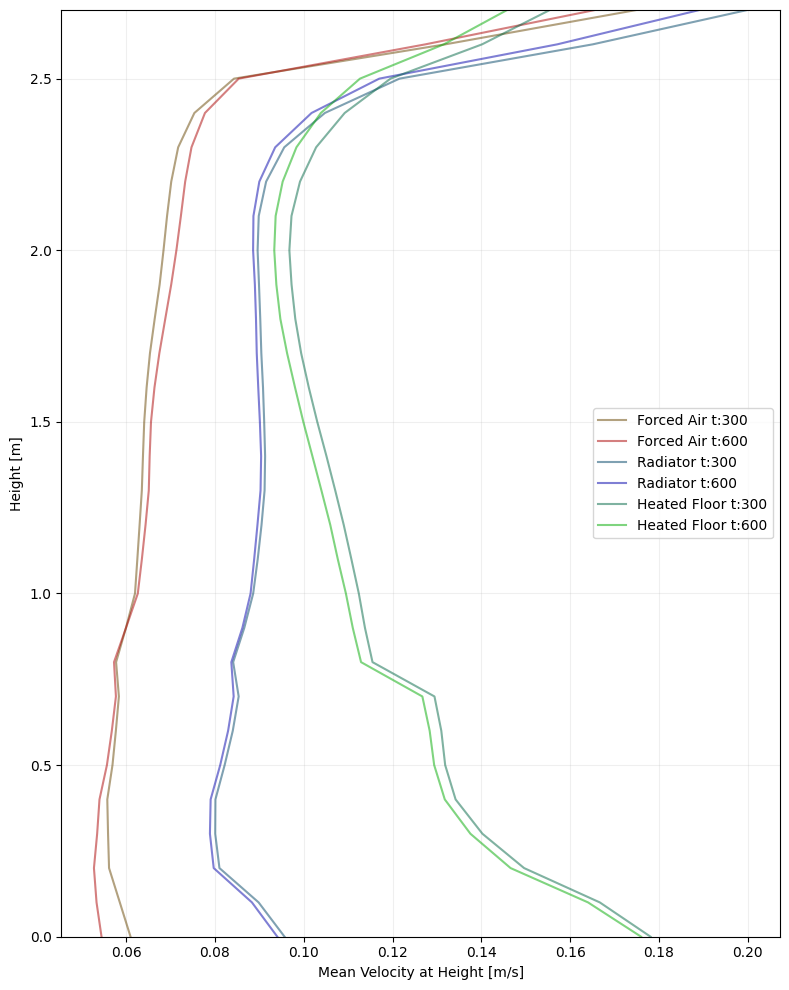

In [16]:
## This is a copy of the script from Filtering.ipynb
heights = []
for i in range(28):
    heights.append(i/10)

plt.figure(figsize=(8,10))
plt.xlabel('Mean Velocity at Height [m/s]')
plt.grid(alpha=0.2)
#plt.xlim(26,31)
plt.ylim(0,2.7)
plt.ylabel('Height [m]')
#heating:with forced air:linear vent
#plt.plot(vel_i,heights,label='Forced Air t:0',color="#440000",alpha=0.5,linewidth=1.5)
plt.plot(vel_m,heights,label='Forced Air t:300',color="#664400",alpha=0.5,linewidth=1.5)
plt.plot(vel_f,heights,label='Forced Air t:600',color="#AA0000",alpha=0.5,linewidth=1.5)

#cooling:with radiator:swirl vent
#plt.plot(vel_i_c,heights,label='Cooling t:0',color="#000044",alpha=0.5,linewidth=1.5)
plt.plot(vel_m_c,heights,label='Radiator t:300',color="#004466",alpha=0.5,linewidth=1.5)
plt.plot(vel_f_c,heights,label='Radiator t:600',color="#0000AA",alpha=0.5,linewidth=1.5)

#ventilation:with floor heating:louvered vent
#plt.plot(vel_i_v,heights,label='Ventilation t:0',color="#004400",alpha=0.5,linewidth=1.5)
plt.plot(vel_m_v,heights,label='Heated Floor t:300',color="#006644",alpha=0.5,linewidth=1.5)
plt.plot(vel_f_v,heights,label='Heated Floor t:600',color="#00AA00",alpha=0.5,linewidth=1.5)


plt.legend()
plt.tight_layout()
plt.savefig('vel_strat_hc.png',dpi=300)

## Comparison of Final Velocity and Temperature at Room Center

d:\FDS\db_env\Lib\site-packages\numpy\lib\_npyio_impl.py:1036: UserWarning: no explicit representation of timezones available for np.datetime64
  arr = _load_from_filelike(


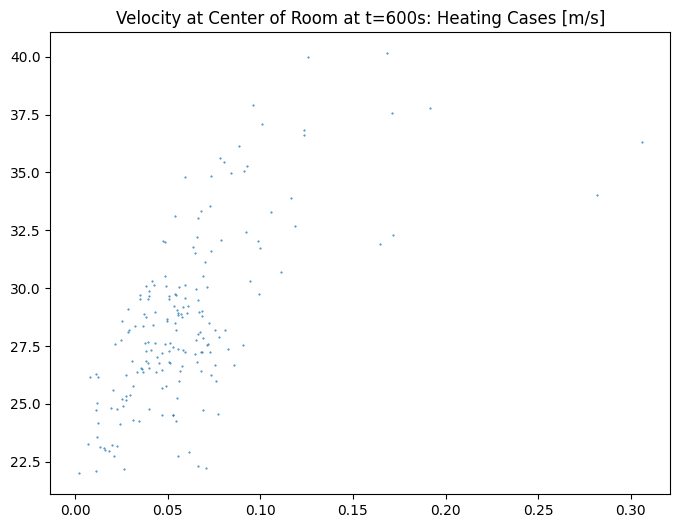

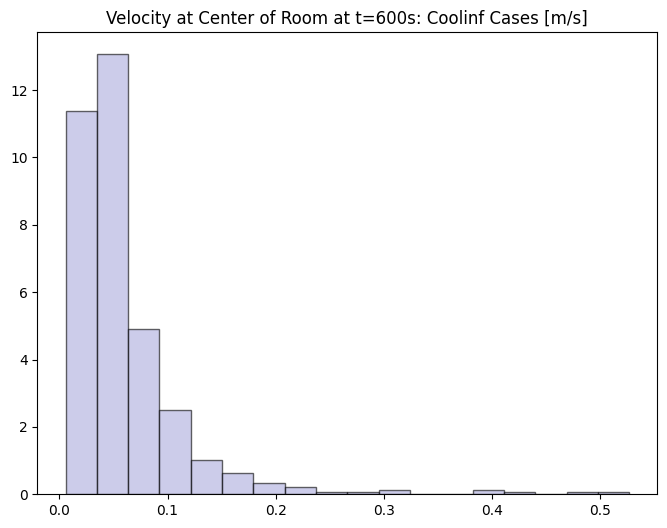

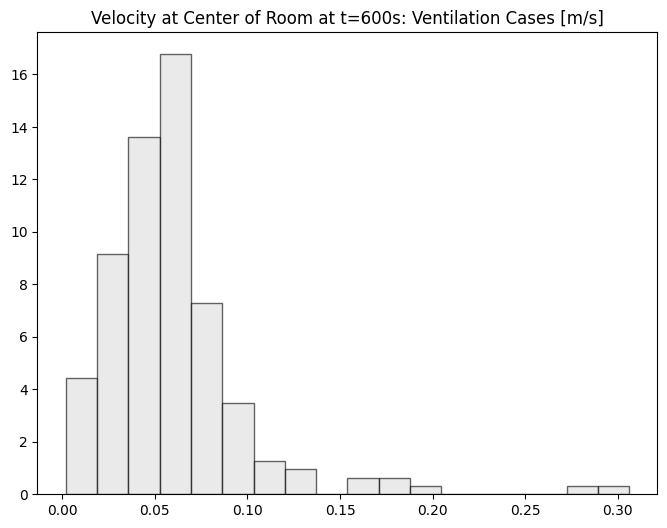

In [21]:
#temperature distribution at t:600 based on case type; histograms and scatter plot
res = 1200
runs = 2000

temps_30h = []
temps_30c = []
temps_30v = []
vels_30h = []
vels_30c = []
vels_30v = []

for i in runs_list:
    row = data[data['CHID']==i]
    case = row['Case Type'].iloc[0]
    sim = fds.Simulation(r'euler/fds/'+str(i)+'/'+str(i))
    xmid = max(sim.meshes[0][0])/2
    ymid = max(sim.meshes[0][1])/2
    xint = int(xmid*10)
    yint = int(ymid*10)
    zmid = max(sim.meshes[0][2])/2
    zmidint = int(zmid*10)
    if case == 'Heating':
        temps_30h.append((sim.slices[0][0].data[20,xint,yint,zmidint]))
        vels_30h.append((sim.slices[1][0].data[20,xint,yint,zmidint]))
    if case == 'Cooling':
        temps_30c.append((sim.slices[0][0].data[20,xint,yint,zmidint]))
        vels_30c.append((sim.slices[1][0].data[20,xint,yint,zmidint]))
    if case == 'Ventilation':
        temps_30v.append((sim.slices[0][0].data[20,xint,yint,zmidint]))
        vels_30v.append((sim.slices[1][0].data[20,xint,yint,zmidint]))

#Final temperature distribution
plt.figure(figsize=(8,6))
plt.title('Velocity at Center of Room at t=600s: Heating Cases [m/s]') #create scatterplot of velocity vs. temperature (heating cases in this case)
#plt.hist(temps_30f,bins=18,density=True, alpha=0.6, color='#DDAAAA', edgecolor='black')
plt.scatter(temps_30v,vels_30v,s=0.2)
plt.savefig('vel600s_heating.png',dpi=300)

plt.figure(figsize=(8,6))
plt.title('Velocity at Center of Room at t=600s: Cooling Cases [m/s]') #final temperature distribution (cooling cases)
plt.hist(temps_30c,bins=18,density=True, alpha=0.6, color='#AAAADD', edgecolor='black')
plt.savefig('vel600s_cooling.png',dpi=300)

plt.figure(figsize=(8,6))
plt.title('Velocity at Center of Room at t=600s: Ventilation Cases [m/s]') #final temperature distribution (ventilation cases)
plt.hist(temps_30v,bins=18,density=True, alpha=0.6, color='#DDDDDD', edgecolor='black')
plt.savefig('vel600s_ventilation.png',dpi=300)

## Scatter Plot Temperature vs. Velocity at t=600s; aggregated by case type

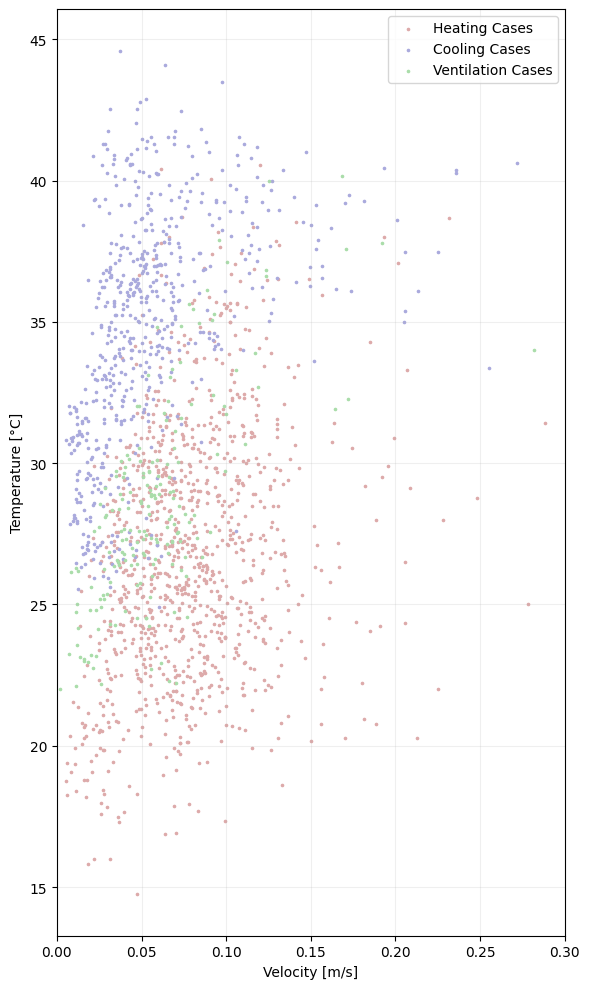

In [35]:
plt.figure(figsize=(6,10))
plt.xlim(0,0.3)
plt.xlabel('Velocity [m/s]')
plt.ylabel('Temperature [°C]')
#plt.hist(temps_30f,bins=18,density=True, alpha=0.6, color='#DDAAAA', edgecolor='black')
plt.scatter(temps_30h,vels_30h,s=2.6,color='#DDAAAA',label='Heating Cases')
plt.scatter(temps_30c,vels_30c,s=2.6,color='#AAAADD',label='Cooling Cases')
plt.scatter(temps_30v,vels_30v,s=2.6,color='#AADDAA',label='Ventilation Cases')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('vel-temp_scatter.png',dpi=300)